In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os
from corner import hist2d
%config InlineBackend.figure_format = 'retina'

In [2]:
mg_ref = Table.read('Catalogs/moving_groups_ref.csv')
file_source_ref = Table.read('Catalogs/source_ref.csv')
mg = fits.open('Catalogs/mactivity_movinggroups_confirmed.fits')
mg_all = fits.open('Catalogs/mactivity_movinggroups_gaia.fits')

In [3]:
mask_not_wd = mg[1].data['group_num']!=0
mask_mdwarfs = (mg[1].data['phot_g_mean_mag'] - mg[1].data['phot_rp_mean_mag'] > 0.8)
mask_halpha_not_accreation = mg[1].data['ewha']<20
mask = mask_not_wd * mask_mdwarfs * mask_halpha_not_accreation

age = mg[1].data['age'][mask]*1e6
age_error = mg[1].data['age_error'][mask]*1e6
spt = mg[1].data['spt'][mask]
ewha = mg[1].data['ewha'][mask]
ewha_err = mg[1].data['ewha_error'][mask]
group_num = mg[1].data['group_num'][mask]
group_name = mg[1].data['group_name'][mask]
source_num = mg[1].data['source_num'][mask]
source_ref = mg[1].data['source_ref'][mask]
g = mg[1].data['phot_g_mean_mag'][mask]
rp = mg[1].data['phot_rp_mean_mag'][mask]
g_rp = g-rp
parallax = mg[1].data['parallax'][mask]
g_abs = mg[1].data['phot_g_mean_mag'][mask] - 5*(np.log10(1e3/parallax)-1)

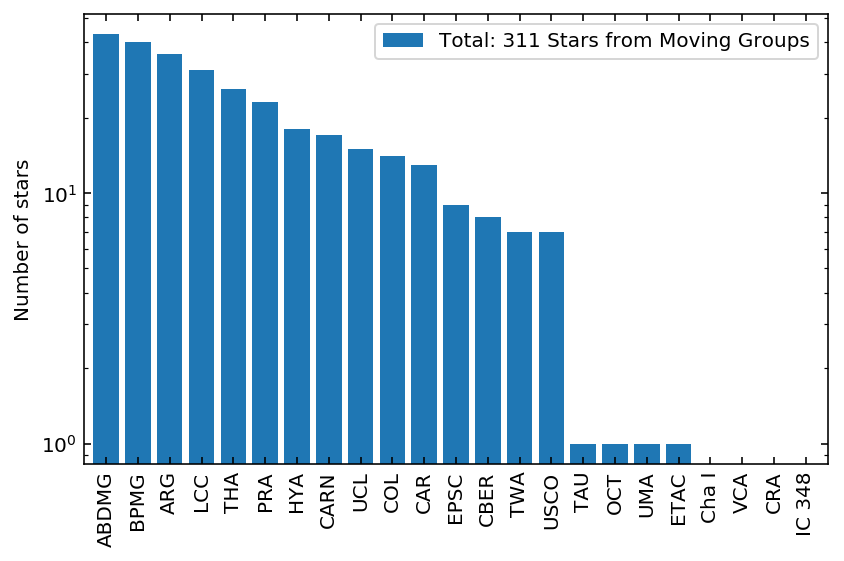

In [4]:
labels = mg_ref['name']
x2 = mg_ref['group_num']

N = 31
bins= np.arange(1,N)
y,bin_edges = np.histogram(group_num,bins=bins)
idx = np.flip(np.argsort(y))
y1,x1 = y[idx],bin_edges[idx]

plt.bar(bins[:-1],y1,label='Total: {} Stars from Moving Groups'.format(len(age)))
plt.xticks(bins, labels[idx], rotation=90)
plt.yscale('log')
plt.xlim(0.3,23.7)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.ylabel('Number of stars')
plt.legend()
plt.tight_layout()
plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/Mdwarfpergroup.png',
            dpi=300,tight_layout=True)
plt.show()

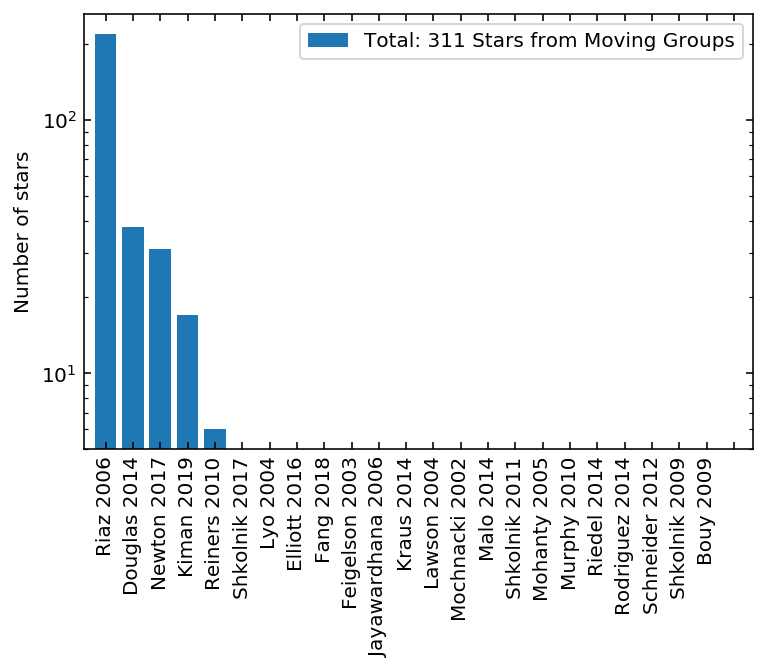

In [5]:
labels_source = file_source_ref['source_ref']
x2_source = file_source_ref['source_ref']

N = 24
bins= np.arange(0,N)
y,bin_edges = np.histogram(source_num,bins=bins)
idx = np.flip(np.argsort(y))
y1,x1 = y[idx],bin_edges[idx]

plt.bar(bins[:-1],y1,label='Total: {} Stars from Moving Groups'.format(len(age)))
plt.xticks(bins, labels_source[idx], rotation=90)
plt.yscale('log')
plt.xlim(-0.8,23.7)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.ylabel('Number of stars')
plt.legend()
plt.show()

In [6]:
mg_all = fits.open('Catalogs/mactivity_movinggroups.fits')
mg_all_gaia = fits.open('Catalogs/mactivity_movinggroups_gaia.fits')

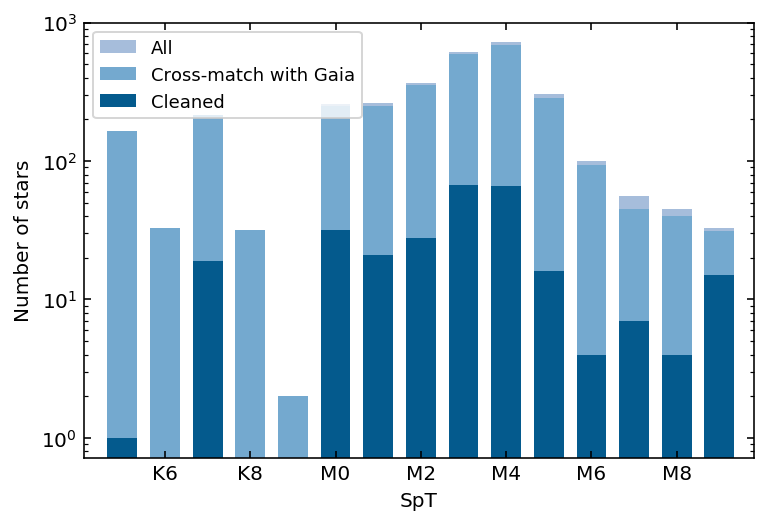

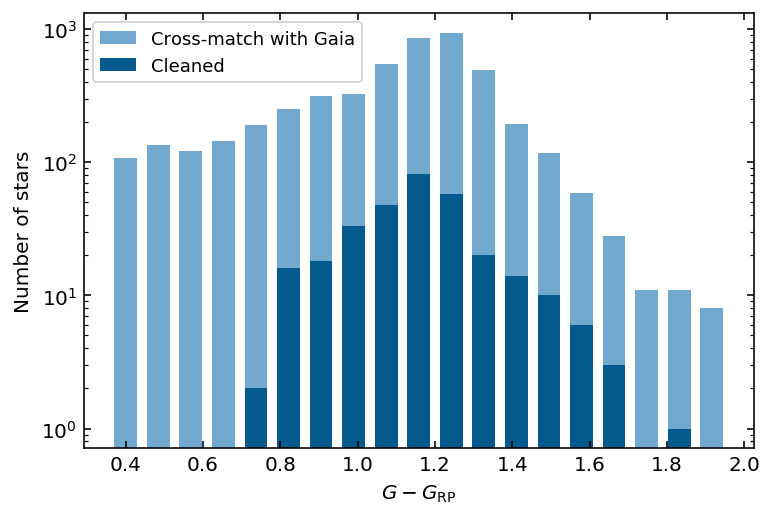

In [23]:
color1,color2,color3 = '#a6bddb','#74a9cf','#045a8d'
alpha = 1
width = 0.7
bins=np.linspace(0.4,2,20)

plt.hist(mg_all[1].data['spt'],bins=np.arange(-5,11),histtype='bar',align='left',rwidth=width,label='All',
         color=color1, alpha=alpha)
plt.hist(mg_all_gaia[1].data['spt'],bins=np.arange(-5,11),histtype='bar',align='left',rwidth=width,
         label='Cross-match with Gaia',color=color2, alpha=alpha)
plt.hist(spt,bins=np.arange(-5,11),histtype='bar',align='left',rwidth=width, label='Cleaned',
         color=color3, alpha=alpha)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.legend(fontsize=9)
plt.yscale('log')
plt.xlim(-5.9,9.8)
plt.xticks(np.arange(-4,10,2),['K6','K8','M0','M2','M4','M6','M8'])
plt.xlabel('SpT')
plt.ylabel('Number of stars')
plt.show()

plt.hist(mg_all_gaia[1].data['phot_g_mean_mag']-mg_all_gaia[1].data['phot_rp_mean_mag'],
         bins=bins,histtype='bar',align='left',rwidth=width,
         label='Cross-match with Gaia',color=color2, alpha=alpha)
plt.hist(g-rp,bins=bins,histtype='bar',align='left',rwidth=width, label='Cleaned',
         color=color3, alpha=alpha)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.legend(fontsize=9)
plt.yscale('log')
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel('Number of stars')
plt.show()

In [8]:
target_url = 'https://zenodo.org/record/2636692/files/MLSDSS-GaiaDR2_extended.fits?download=1'
mlsdss = fits.open(target_url)

In [9]:
r_ext = mlsdss[1].data['EXTINCTION'][:,2]
z_ext = mlsdss[1].data['EXTINCTION'][:,4]
ext = r_ext-z_ext
subred = mlsdss[1].data['photometric_sample_subred'] == 1
mask_ext = ext < 0.1

G_ml = mlsdss[1].data['phot_g_mean_mag'][subred*mask_ext]
RP_ml = mlsdss[1].data['phot_rp_mean_mag'][subred*mask_ext]
G_RP_ml = G_ml-RP_ml
parallax_ml = mlsdss[1].data['parallax'][subred*mask_ext]
dist_ml = 1e3/parallax_ml
G_abs_ml = G_ml + 5.0 - 5.0*np.log10(dist_ml)

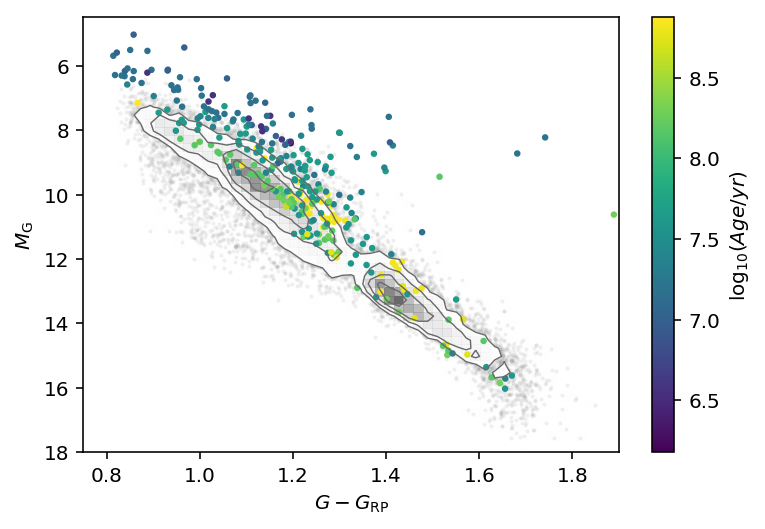

In [10]:
contour_color = 'dimgray'

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7})
plt.scatter(g_rp,g_abs,c=np.log10(age),s=5)
plt.xlim(0.75,1.9)
plt.ylim(18,4.5)
plt.colorbar(label=r'$\log _{10}(Age/yr)$')
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_{\rm G}$')
plt.show()

# Summary table 

### Sources

In [11]:
Ntot = len(source_ref)
total = 0
n = len(file_source_ref['source_num'])
for i in range(n):
    mask_group = source_num==file_source_ref['source_num'][i]
    if(len(age[mask_group])!=0):
        total += len(source_ref[mask_group])
print(Ntot,total)

311 311


In [12]:
Ntot = len(mg_all[1].data['source_num'])
total = 0
n = len(file_source_ref['source_num'])
for i in range(n):
    mask_group = mg_all[1].data['source_num']==file_source_ref['source_num'][i]
    if(len(mg_all[1].data['age'][mask_group])!=0):
        total += len(mg_all[1].data['source_num'][mask_group])
print(Ntot,total)

5450 5450


In [13]:
os.remove('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/sources_summary.tex')
file_sources = open('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/sources_summary.tex','x')

In [14]:
n_kiman = len(source_ref[source_ref=='Kiman 2019'])
file_sources.write('\\begin{deluxetable*}{cccc}[ht!]\n')
file_sources.write('\\tablecaption{References for' +r'$H\alpha$'+' Equivalent Width from Moving Groups. \\label{table:source_ref}}\n')
file_sources.write('\\tablehead{\\colhead{Referece} & \\colhead{Resolution} & \\colhead{$N$ Stars} & \\colhead{$N_{TOT}$ Stars} \\\ & & Total='+ str(len(source_ref))+'& Total='+ str(len(mg_all[1].data['source_ref'])+n_kiman)+'\n}')
file_sources.write('\\startdata \n')
n = len(file_source_ref['source_ref'])
for i in range(n):
    mask_group1 = source_num==file_source_ref['source_num'][i]
    mask_group2 = mg_all[1].data['source_num']==file_source_ref['source_num'][i]
    if(file_source_ref['source_num'][i]==file_source_ref['source_num'][file_source_ref['source_ref']=='Kiman 2019']):
        file_sources.write('{} &{}&{}&{}\\\ \n'.format(file_source_ref['cite'][i],file_source_ref['resolution'][i],
                                               len(source_ref[mask_group1]),len(source_ref[mask_group1])))
    else:
        if(len(age[mask_group1])!=0):
            file_sources.write('{} &{}&{}&{}\\\ \n'.format(file_source_ref['cite'][i],file_source_ref['resolution'][i],
                                                   len(source_ref[mask_group1]),
                                                        len(mg_all[1].data['source_ref'][mask_group2]))) 
        if(len(age[mask_group1])==0):
            file_sources.write('{} &{}&{}&{}\\\ \n'.format(file_source_ref['cite'][i],file_source_ref['resolution'][i],
                                                   0,len(mg_all[1].data['source_ref'][mask_group2]))) 
    
file_sources.write('\\enddata \n')
file_sources.write('\\tablecomments{Notes.} \n')
file_sources.write('\\end{deluxetable*}\n')

19

In [15]:
file_sources.close()

### Moving groups

In [21]:
os.remove('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/mgsummary.tex')

In [22]:
file_mg = open('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/mgsummary.tex','x')

In [23]:
len(age)

1117

In [24]:
file_mg.write('\\begin{deluxetable*}{ccccc}[ht!]\n')
file_mg.write('\\tablecaption{Moving Groups Summary. \\label{table:mgsum}}\n')
file_mg.write('\\tablehead{\\colhead{Moving Group} & \\colhead{$N$ Stars} & \\colhead{Source Papers} & \\colhead{Age (Myr)} & \\colhead{Ref. Age} \\\ & Total:'+ str(len(age))+' &  &  & \n}')
file_mg.write('\\startdata \n')
n = len(mg_ref['name'])
for i in range(n):
    mask_group = group_num==mg_ref['group_num'][i]
    if(len(age[mask_group])!=0):
        file_mg.write('{} &{}&{}& ${}\pm {}$&{}\\\ \n'.format(mg_ref['name'][i],
                                                             len(age[mask_group]),
                                                             np.unique(source_num[mask_group]),
                                                             mg_ref['age'][i],mg_ref['age_error'][i],
                                                             mg_ref['ref_age'][i]))  
file_mg.write('\\enddata \n')
file_mg.write('\\tablecomments{Groups.} \n')
file_mg.write('\\end{deluxetable*}\n')

19

In [25]:
file_mg.close()